In [1]:
%load_ext autoreload
%autoreload 2
from Model import Model

In [2]:
image_shape = (299,299,3)
embedding_dim = 256
top_k = 5000
lstm_units = 512
vocab_size = top_k + 1

from dataLoader import DataLoader
data_path = 'C:/Data/Flickr30k'
dataLoader = DataLoader(data_path, 1)
dataLoader.convert_to_dataset(top_k)

max_length = dataLoader.max_length

In [3]:
model = Model(image_shape, lstm_units, embedding_dim, top_k, max_length)

In [4]:
BATCH_SIZE = 1
BUFFER_SIZE = 1000
model.train(dataLoader, BATCH_SIZE, BUFFER_SIZE, 100)

Epoch 1 Batch 0 Loss 5.9635
Epoch 1 Loss 10.565761
Time taken for 1 epoch 32.85824394226074 sec

Epoch 2 Batch 0 Loss 10.0158
Epoch 2 Loss 9.725739
Time taken for 1 epoch 3.195284843444824 sec

Epoch 3 Batch 0 Loss 14.6406
Epoch 3 Loss 8.857051
Time taken for 1 epoch 3.061798095703125 sec

Epoch 4 Batch 0 Loss 7.1412
Epoch 4 Loss 6.434903
Time taken for 1 epoch 3.015697956085205 sec

Epoch 5 Batch 0 Loss 4.5951
Epoch 5 Loss 5.439709
Time taken for 1 epoch 3.6030023097991943 sec

Epoch 6 Batch 0 Loss 5.4236
Epoch 6 Loss 5.119119
Time taken for 1 epoch 3.5574238300323486 sec

Epoch 7 Batch 0 Loss 4.6007
Epoch 7 Loss 4.053145
Time taken for 1 epoch 3.133960008621216 sec

Epoch 8 Batch 0 Loss 4.1614
Epoch 8 Loss 3.713024
Time taken for 1 epoch 2.639862060546875 sec

Epoch 9 Batch 0 Loss 2.8084
Epoch 9 Loss 3.328204
Time taken for 1 epoch 2.650808572769165 sec

Epoch 10 Batch 0 Loss 3.1838
Epoch 10 Loss 3.108400
Time taken for 1 epoch 2.6376194953918457 sec

Epoch 11 Batch 0 Loss 2.3288
Epo

Epoch 85 Batch 0 Loss 0.8041
Epoch 85 Loss 0.774493
Time taken for 1 epoch 3.0125529766082764 sec

Epoch 86 Batch 0 Loss 0.7823
Epoch 86 Loss 0.757507
Time taken for 1 epoch 2.503556728363037 sec

Epoch 87 Batch 0 Loss 0.5621
Epoch 87 Loss 0.747786
Time taken for 1 epoch 2.4905309677124023 sec

Epoch 88 Batch 0 Loss 0.8786
Epoch 88 Loss 0.751993
Time taken for 1 epoch 2.486521005630493 sec

Epoch 89 Batch 0 Loss 0.9770
Epoch 89 Loss 0.762751
Time taken for 1 epoch 2.5326273441314697 sec

Epoch 90 Batch 0 Loss 0.4734
Epoch 90 Loss 0.754972
Time taken for 1 epoch 2.7140302658081055 sec

Epoch 91 Batch 0 Loss 0.4577
Epoch 91 Loss 0.742660
Time taken for 1 epoch 2.779174566268921 sec

Epoch 92 Batch 0 Loss 0.8334
Epoch 92 Loss 0.757910
Time taken for 1 epoch 2.656900644302368 sec

Epoch 93 Batch 0 Loss 0.5092
Epoch 93 Loss 0.756584
Time taken for 1 epoch 3.119929552078247 sec

Epoch 94 Batch 0 Loss 0.5601
Epoch 94 Loss 0.747445
Time taken for 1 epoch 3.3043372631073 sec

Epoch 95 Batch 0 L

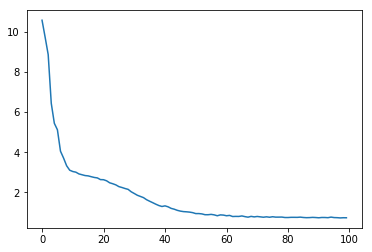

In [10]:
import matplotlib.pyplot as plt
plt.plot(model.loss_plot)

In [6]:
from Model import map_func
sample = dataloader.img_name_train[0]
cap = dataLoader.org_data[sample]
img,_ = map_func(sample, None)

In [7]:
[print(c) for c in cap]

<start> A man in shorts and a Hawaiian shirt leans over the rail of a pilot boat, with fog and mountains in the background. <end>
<start> A young man hanging over the side of a boat, which is in a like with fog rolling over a hill behind it. <end>
<start> A man is leaning off of the side of a blue and white boat as it sits in a body of water. <end>
<start> A man riding a small boat in a harbor, with fog and mountains in the background. <end>
<start> A man on a moored blue and white boat with hills and mist in the background. <end>


[None, None, None, None, None]

In [8]:
predict = model.predict(img[None,...], dataLoader.tokenizer)

In [19]:
sample

'C:/Data/Flickr30k\\flickr30k_images\\998845445.jpg'

a blue and white boat with hills and white boat which is leaning off of water


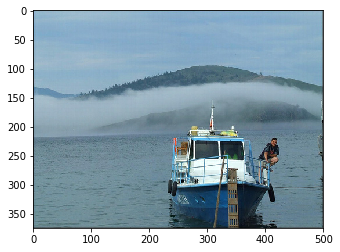

In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
img_1 = tf.io.read_file(sample)
img_1 = tf.image.decode_jpeg(img_1, channels=3)
plt.imshow(img_1)
print(' '.join(predict))

In [13]:
import numpy as np
print(np.min(img.numpy()),np.max(img.numpy())) 

-122.701126 151.061
